In [1]:
import keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170508288/170498071 [==============================] - 18s 0us/step


In [0]:
import numpy as np
import tensorflow as tf

In [0]:
def normalization(images):
    images = images.reshape(-1, 3072)
    each_pixel_mean = images.mean(axis=0)
    each_pixel_std = np.std(images, axis=0)
    images = np.divide(np.subtract(images, each_pixel_mean), each_pixel_std)
    return images.reshape(-1, 32, 32, 3)

In [0]:
training_images, training_labels = normalization(x_train), y_train
test_images, test_labels = normalization(x_test), y_test

In [0]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [0]:
def reshapedata(training_images,test_images):
    n_samples = len(training_images)
    n_samples_test = len(test_images)
    training_images = training_images.reshape((n_samples,-1))
    test_images = test_images.reshape((n_samples_test,-1))
    return training_images,test_images
def applyPCA(trainingdata,ncomponents):
    pca = PCA(ncomponents)
    x_image = pca.fit_transform(trainingdata)
    return x_image

In [7]:
#set PCA n_component = 13, n_neighbors = 59
def knnclassifier_chosed(training_images,training_labels,test_images,test_labels):
    training_images,test_images=reshapedata(training_images,test_images)
    training_images = applyPCA(training_images,13)
    test_images = applyPCA(test_images,13)
    neigh = KNeighborsClassifier(59)
    neigh.fit(training_images,training_labels)
    predict_labels = neigh.predict(test_images)
    accuracy = accuracy_score(test_labels, predict_labels)
    return predict_labels, accuracy

predict_labels, accuracy = knnclassifier_chosed(training_images,training_labels,test_images,test_labels)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [0]:
test_labels = y_test.T[0]

In [9]:
def confusion_matrix(actual, predict):
    cmatrix = np.zeros((10, 10)).astype(int)
    for i in range(10000):
        if actual[i] == predict[i]:
            cmatrix[actual[i]][actual[i]] += 1
        else:
            cmatrix[actual[i]][predict[i]] += 1
    return cmatrix

cm = confusion_matrix(test_labels, predict_labels)
print(cm)
print("Accuracy = {:>6.4f}".format(cm.diagonal().sum()*1.0/cm.sum()))

[[492  33  74   8  53  10  51  41 202  36]
 [ 71 308  52  12 102  25 144  28 141 117]
 [138  25 288  37 169  24 192  59  36  32]
 [ 55  40 115 118 162 123 220  78  25  64]
 [ 50  17 195  17 367  20 206  71  37  20]
 [ 40  24 142  74 146 237 173  95  45  24]
 [ 36  11 142  22 179  31 479  53  12  35]
 [ 65  43  91  26 188  55 107 296  44  85]
 [115  63  30  24  42  38  23  28 564  73]
 [ 79 112  49  17  66  17  89  67 175 329]]
Accuracy = 0.3478


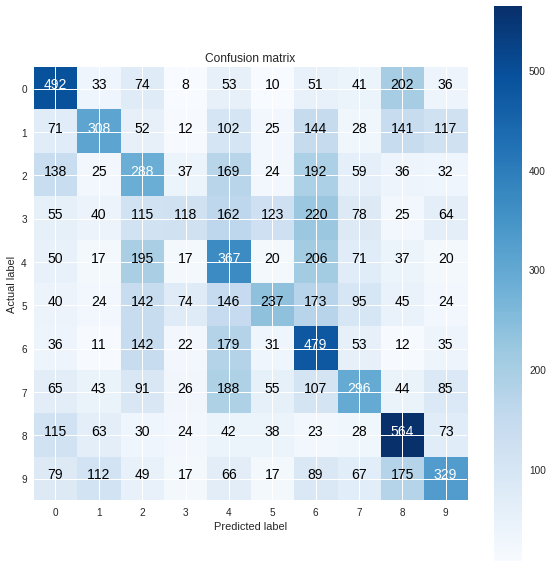

In [10]:
import math
import matplotlib.pyplot as plt
import numpy as np
import itertools
%matplotlib inline

def plot_confusion_matrix(cm, label_num):
    labels = range(label_num)
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    marks = np.arange(len(labels))
    plt.xticks(marks, labels)
    plt.yticks(marks, labels)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, int(cm[i, j]), fontsize=14,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm, 10)

In [11]:
def evaluation(cmatrix):
    print("|  Label  | Precision | Recall | F-Score |")
    total_p = 0
    total_r = 0
    total_f = 0
    for i in range(10):
        precision = cmatrix[i, i]*1.0/cmatrix[:, i].sum()
        recall = cmatrix[i, i]*1.0/cmatrix[i, :].sum()
        fscore = precision*recall*2.0/(precision+recall)
        total_p += precision
        total_r += recall
        total_f += fscore
        print('|{:>8d} | {:>9.4f} | {:>6.4f} | {:>7.4f} |'.format(i, precision, recall, fscore))
    print('| Average | {:>9.4f} | {:>6.4f} | {:>7.4f} |'.format(total_p/10.0, total_r/10.0, total_f/10.0))

evaluation(cm)

|  Label  | Precision | Recall | F-Score |
|       0 |    0.4312 | 0.4920 |  0.4596 |
|       1 |    0.4556 | 0.3080 |  0.3675 |
|       2 |    0.2445 | 0.2880 |  0.2645 |
|       3 |    0.3324 | 0.1180 |  0.1742 |
|       4 |    0.2490 | 0.3670 |  0.2967 |
|       5 |    0.4086 | 0.2370 |  0.3000 |
|       6 |    0.2844 | 0.4790 |  0.3569 |
|       7 |    0.3627 | 0.2960 |  0.3260 |
|       8 |    0.4403 | 0.5640 |  0.4945 |
|       9 |    0.4037 | 0.3290 |  0.3625 |
| Average |    0.3612 | 0.3478 |  0.3402 |


In [12]:
#crossvalidation

def evaluation(scores):
    print("|Folder No.|   Score   |")
    scoreave = 0
    for i in range(10):
        thescore = scores[i]
        scoreave = scoreave+scores[i]
        print('|{:>9d} | {:>9.4f} |'.format(i, thescore))
    print('| Average  | {:>9.4f} |'.format(scoreave/10.0))
        
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier(59)
training_images,test_images = reshapedata(training_images,test_images)
training_images = applyPCA(training_images,13)
scores = cross_val_score(clf, training_images, training_labels, cv=10)

evaluation(scores)

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


|Folder No.|   Score   |
|        0 |    0.3930 |
|        1 |    0.3800 |
|        2 |    0.3878 |
|        3 |    0.3732 |
|        4 |    0.3890 |
|        5 |    0.3808 |
|        6 |    0.3726 |
|        7 |    0.3766 |
|        8 |    0.3846 |
|        9 |    0.3798 |
| Average  |    0.3817 |
